# 1.读取数据，分词，去除停用词

## 1.1读取数据
* weibo：DataFrame存储的博文及其对应标签；
* content：list，元素为各个博文，逗号分隔，博文为字符串形式。

In [1]:
import pandas as pd

In [2]:
weibo = pd.read_csv('./data/all_data.txt',sep='\t', names=['is_not_rumor','content'],encoding='utf-8')
weibo = weibo.dropna()#删除缺失值
weibo.head()

,is_not_rumor,content
0,0,【震惊：婴儿被害案另有隐情】周喜军儿子周磊为真凶，周磊平日游手好闲，江湖称号“经开三哥”。警...
1,1,郭德纲和于谦最新段子《屌丝青年》笑死人！！!http://t.cn/zlvEBLA 德云社庆...
2,1,【在喜欢的人面前反而害羞的男生】第一名 水瓶座（不敢正视喜欢的人）；第二名 金牛座（像小孩儿...
3,1,#21世纪明天日报# 【华为击中了小米什么？】先是和格力电器董事长董明珠立下10亿元的对赌协...
4,1,【曝林峰吴千语同居三月 年底厦门完婚】据港媒报道，林峰痴恋吴千语达爆灯程度，被网民笑如中了“...


In [3]:
weibo.shape

(3387, 2)

In [4]:
#将DataFrame中的Series转换为list
content = weibo.content.values.tolist()

In [5]:
print (content[3:5])

['#21世纪明天日报# 【华为击中了小米什么？】先是和格力电器董事长董明珠立下10亿元的对赌协议，然后又在生日这天收到华为赤裸裸的战书，小米创始人雷军最近忙死了。华为“荣耀”来势汹汹，是否能够PK掉小米？', '【曝林峰吴千语同居三月 年底厦门完婚】据港媒报道，林峰痴恋吴千语达爆灯程度，被网民笑如中了“BB降”。近月，为多见吴千语几面，有豪宅不住，搬到吴千语香闺同居试婚。同居朝夕相对，二人更觉难舍难离，林峰终落实年底厦门摆酒迎娶吴千语。详情：http://t.cn/8shiAbn [吃惊]求真相！不过真心祝福！']


## 1.2分词
使用jieba分词器进行分词
* content_S：list of list，各个博文的分词结果；
* df_content：将content_S转换为DataFrame格式。

In [6]:
import jieba

In [7]:
#其元素为所有博文的分词结果，list类型
content_S = []
for line in content:
    current_segment = jieba.lcut(line)#列表，元素为分割出来的词
    if len(current_segment) > 1 and current_segment != '\r\n': #换行符
        content_S.append(current_segment)

Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 0.598 seconds.
Prefix dict has been built successfully.


In [8]:
content_S[4]

['【',
 '曝林峰',
 '吴千语',
 '同居',
 '三月',
 ' ',
 '年底',
 '厦门',
 '完婚',
 '】',
 '据港媒',
 '报道',
 '，',
 '林峰',
 '痴恋',
 '吴千语',
 '达',
 '爆灯',
 '程度',
 '，',
 '被',
 '网民',
 '笑',
 '如',
 '中',
 '了',
 '“',
 'BB',
 '降',
 '”',
 '。',
 '近',
 '月',
 '，',
 '为',
 '多',
 '见',
 '吴千语',
 '几面',
 '，',
 '有',
 '豪宅',
 '不住',
 '，',
 '搬到',
 '吴千语',
 '香闺',
 '同居',
 '试婚',
 '。',
 '同居',
 '朝夕',
 '相对',
 '，',
 '二人',
 '更觉',
 '难舍难离',
 '，',
 '林峰终',
 '落实',
 '年底',
 '厦门',
 '摆酒',
 '迎娶',
 '吴千语',
 '。',
 '详情',
 '：',
 'http',
 ':',
 '/',
 '/',
 't',
 '.',
 'cn',
 '/',
 '8shiAbn',
 ' ',
 '[',
 '吃惊',
 ']',
 '求',
 '真相',
 '！',
 '不过',
 '真心',
 '祝福',
 '！']

In [9]:
df_content=pd.DataFrame({'content_S':content_S})
df_content.head()

,content_S
0,"[【, 震惊, ：, 婴儿, 被害案, 另有隐情, 】, 周喜军, 儿子, 周磊, 为, 真..."
1,"[郭德纲, 和, 于, 谦, 最新, 段子, 《, 屌丝, 青年, 》, 笑死人, ！, ！..."
2,"[【, 在, 喜欢, 的, 人, 面前, 反而, 害羞, 的, 男生, 】, 第一名, ,..."
3,"[#, 21, 世纪, 明天, 日报, #, , 【, 华为, 击中, 了, 小米, 什么..."
4,"[【, 曝林峰, 吴千语, 同居, 三月, , 年底, 厦门, 完婚, 】, 据港媒, 报..."


## 1.3去除停用词
* contents_clean：list of list，contents去除停用词之后的结果；
* all_words：所有的词，包含重复值；
* df_content_clean：DtaFrame格式的contents_clean；
* df_all_words：DtaFrame格式的all_words。

In [10]:
stopwords=pd.read_csv("./stopwords/stopwords.txt",index_col=False,sep="\t",quoting=3,names=['stopword'], encoding='utf-8')
stopwords.head()

,stopword
0,!
1,""""
2,#
3,$
4,%


In [11]:
def drop_stopwords(contents,stopwords):
    contents_clean = []
    all_words = []
    for line in contents:
        line_clean = []
        for word in line:
            if word in stopwords:
                continue
            line_clean.append(word)
            all_words.append(str(word))#str()转换为字符串##记录所有line_clean中的词
        contents_clean.append(line_clean)
    return contents_clean,all_words
    #print (contents_clean)
        

contents = df_content.content_S.values.tolist()    
stopwords = stopwords.stopword.values.tolist()
contents_clean,all_words = drop_stopwords(contents,stopwords)

In [12]:
df_content_clean=pd.DataFrame({'contents_clean':contents_clean})
df_content_clean.head()

,contents_clean
0,"[震惊, 婴儿, 被害案, 另有隐情, 周喜军, 儿子, 周磊, 真凶, 周磊, 平日, 游..."
1,"[郭德纲, 谦, 最新, 段子, 屌丝, 青年, 笑死人, http, t, cn, zlv..."
2,"[喜欢, 面前, 害羞, 男生, 第一名, , 水瓶座, 正视, 喜欢, 第二名, , ..."
3,"[世纪, 明天, 日报, , 华为, 击中, 小米, 先是, 格力电器, 董事长, 董明珠..."
4,"[曝林峰, 吴千语, 同居, 三月, , 年底, 厦门, 完婚, 据港媒, 报道, 林峰,..."


In [13]:
df_all_words=pd.DataFrame({'all_words':all_words})
df_all_words.head()

,all_words
0,震惊
1,婴儿
2,被害案
3,另有隐情
4,周喜军


## 1.4统计词频，绘制词云图

In [16]:
words_count=df_all_words
words_count['count']=df_all_words['all_words'].apply(lambda x: dict(df_all_words['all_words'].value_counts())[x])
words_count.drop_duplicates(["all_words"],inplace=True)
words_count.head()

,all_words,count
0,搜狐,14
1,视频,87
2,最新消息,9
4,今日,73
5,正式,43


In [24]:
save_path = "./data/wordscount.csv"

words_count.to_csv(save_path, index=False)

print("Finish!")

Finish!


In [19]:
from wordcloud import WordCloud

import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (10.0, 5.0)

%matplotlib inline

In [15]:
wordcloud=WordCloud(font_path="./data/simhei.ttf",background_color="white",max_font_size=80)
word_frequence = {x[0]:x[1] for x in words_count.head(100).values}
wordcloud=wordcloud.fit_words(word_frequence)
plt.imshow(wordcloud)

NameError: name 'words_count' is not defined

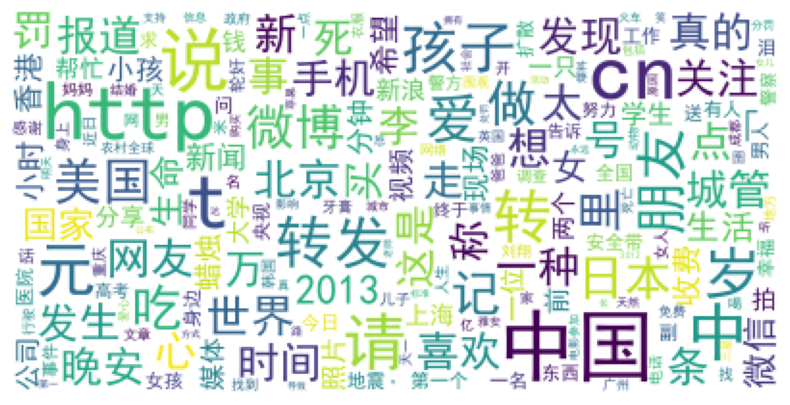

In [21]:
my_words_count = pd.read_csv("./data/wordscount.csv")

# 将词频数据转换为字典对象
my_word_frequence = dict(zip(my_words_count["all_words"], my_words_count["count"]))

# 创建词云对象
mywordcloud = WordCloud(font_path="./data/simhei.ttf", background_color="white", max_font_size=80)

# 将词频数据应用于词云对象
mywordcloud = mywordcloud.fit_words(my_word_frequence)

# 显示词云
plt.imshow(mywordcloud)
plt.axis("off")
plt.show()

# 2.分类检测
贝叶斯分类器

## 2.1划分数据集，数据预处理

In [22]:
df_train=pd.DataFrame({'contents_clean':contents_clean,'label':weibo['is_not_rumor']})
df_train.tail()

,contents_clean,label
3382,"[太爱, 抢走, 好几回, 想, 杀掉, 算了, 掏出, 枪, 小心, 身边, 睡着, 惊醒...",1
3383,"[每日, 一帖, 生活, 百科, 生活, 常识, 牙膏, 底部, 短线, 绿色, 天然, 蓝...",0
3384,"[中国, 声音, 长得, xx, 精选, 超像, 搞笑, , , 网, , 李梓瑶, ...",1
3385,"[打针, 西瓜, 入夏, 西瓜, 首选, 消暑, 食品, 黑心, 商贩, 针头, 对准, 尚...",0
3386,"[花轮, 小丸子, 说, 长大, 结婚, 小丸子, 说, 不行, 挺, 爱, 结婚, 家里,...",1


In [23]:
import sklearn

In [24]:
## 划分数据集
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df_train['contents_clean'].values, df_train['label'].values, random_state=1)

In [25]:
x_train[-1]

['股市', '火']

In [26]:
words = []
for line_index in range(len(x_train)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        words.append(' '.join(x_train[line_index]))
    except:
        print (line_index,word_index)
words[-1]        

'股市 火'

## 2.2贝叶斯分类器分类

In [27]:
from sklearn.naive_bayes import MultinomialNB

### 使用CountVectorizer作词嵌入

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

vec = CountVectorizer(analyzer='word', max_features=4000,  lowercase = False)
#为words中每个词建立字典对应
vec.fit(words)

CountVectorizer(lowercase=False, max_features=4000)

In [29]:
classifier = MultinomialNB()
classifier.fit(vec.transform(words), y_train)

MultinomialNB()

In [30]:
# 测试集数据处理
test_words = []
for line_index in range(len(x_test)):
    try:
        #x_train[line_index][word_index] = str(x_train[line_index][word_index])
        test_words.append(' '.join(x_test[line_index]))
    except:
         print (line_index,word_index)
test_words[1]

'转帖 今夜 牌楼 大街 亲身经历 绑架 事件   南京 姑娘 长 点心 人贩子 太 恐怖 宫小欣 等等等等     原帖 地址 http t cn zHwjZDd    '

In [31]:
classifier.score(vec.transform(test_words), y_test)

0.8606847697756789

### 使用TfidfVectorizer作词嵌入

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(analyzer='word', max_features=4000,  lowercase = False)
vectorizer.fit(words)

TfidfVectorizer(lowercase=False, max_features=4000)

In [33]:
classifier1 = MultinomialNB()
classifier1.fit(vectorizer.transform(words), y_train)

MultinomialNB()

In [34]:
classifier1.score(vectorizer.transform(test_words), y_test)

0.8654073199527745